In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
train = pd.read_csv('train.csv')
train.shape

(8523, 12)

In [75]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [77]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


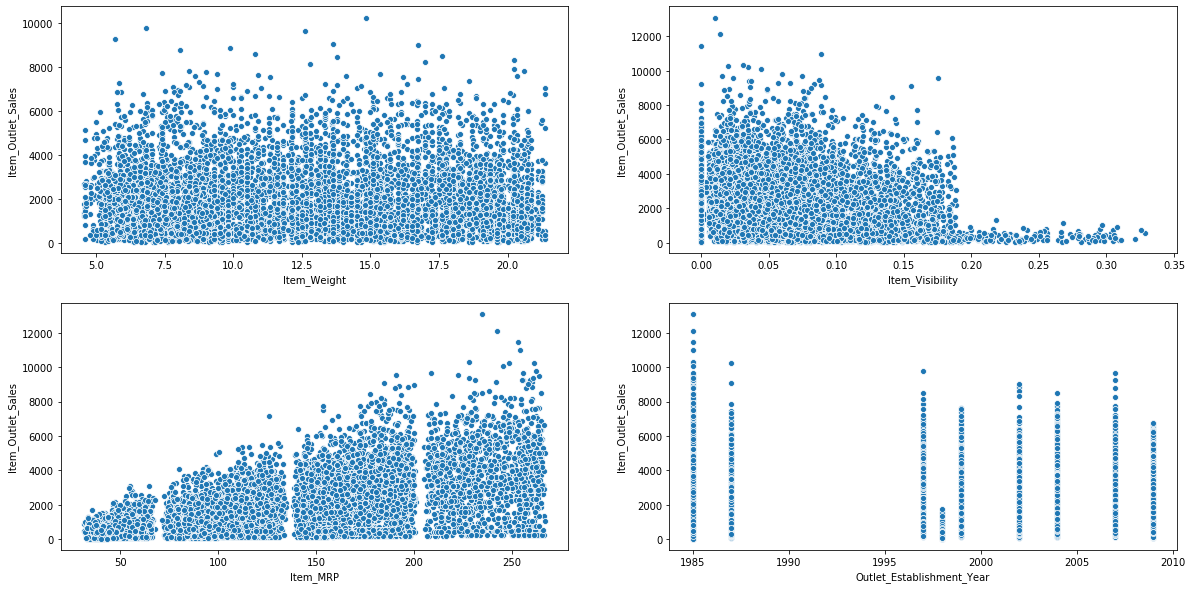

In [78]:
#univariate analysis
num_var = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

fig, ax = plt.subplots(ncols=2 ,nrows=2 , figsize=(20,10))
index = 0
ax = ax.flatten()
for i in num_var:
    sns.scatterplot(x=train[i],y='Item_Outlet_Sales',data=train,ax=ax[index])
    index += 1
    

here we can see that Item_Weight , Item_Visibility , Item_MRP are linearly related to the Item_Outlet_Sales

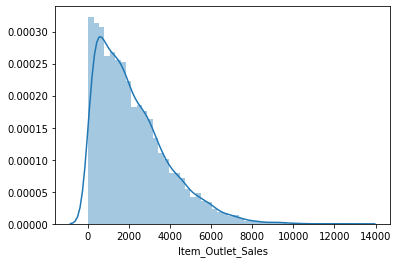

In [79]:
sns.distplot(train['Item_Outlet_Sales'])

Item_Outlet_Sales is positively skewed

In [80]:
#for converting the Item_Fat_Contents classes into 2 numerical category
def fun(x):
  if x=='Low Fat' or x=='LF' or x=='low fat':
    return(0)
  else:
    return(1)

In [81]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].apply(fun)

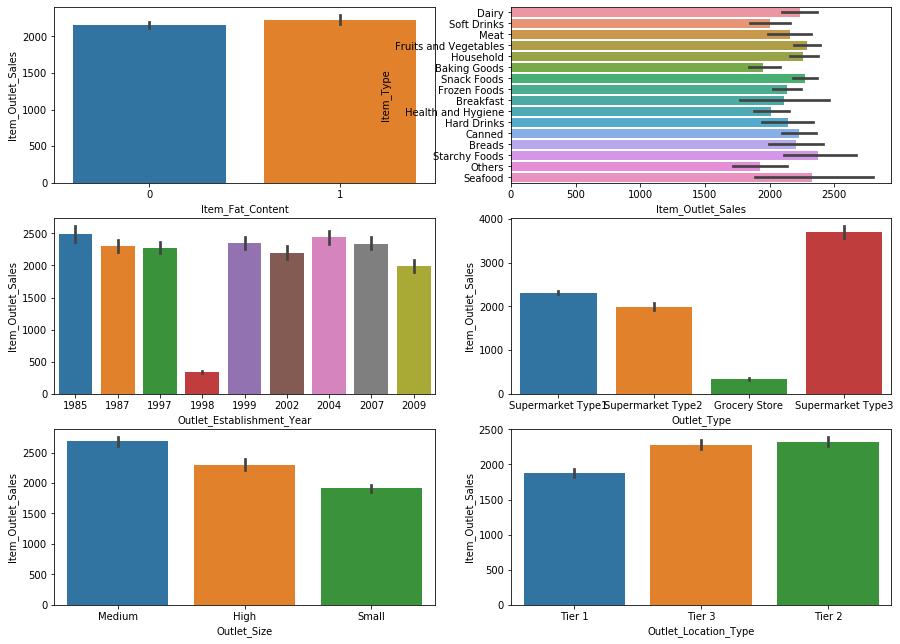

In [82]:
#for subplots

fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,11))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train,ax=ax[0,0])
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,ax=ax[0,1])
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train,ax=ax[1,0])
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train,ax=ax[1,1])
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,ax=ax[2,0])
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,ax=ax[2,1])
plt.show()

1st plot - sales of Regular fat product is higher than of the Low fat products, but no major diff.

2nd plot - sale of dairy , starchy food , seafood , snacks , fruits and vegetables are high, where as baking goods are low

3rd plot- sales were highest in the outlet eastablished in 1985 and lowest in 1998


4th plot - Supermarket Type3 shows high sales, Grocery store shows low sales.

5th plot - Medium size outlet records the max number of sales

6th plot - outlet_location_type of tier 2 shows maximum sales

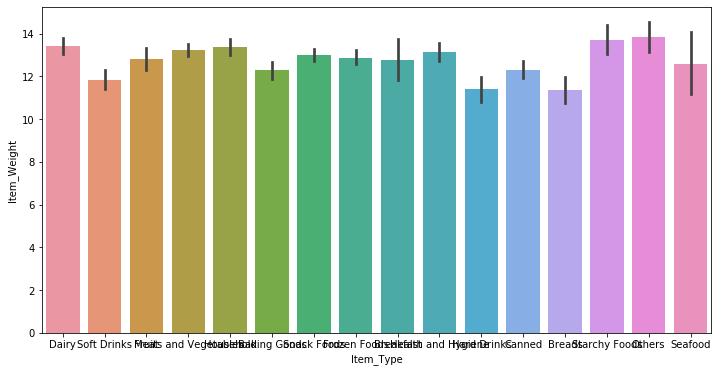

In [83]:
plt.figure(figsize=(12,6))
sns.barplot(x='Item_Type',y='Item_Weight',data=train)
plt.show()

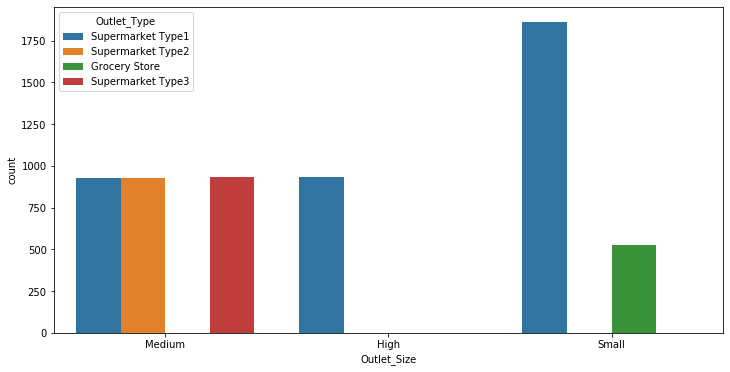

In [84]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outlet_Size',hue='Outlet_Type',data=train)
plt.show()

This shows that if the Outlet_Size is medium then it includes Supermarket type1, Supermarket Type2 and Supermarket Type3 so we can clearly see why the sales were high in Medium Size Outlet

# HANDELING MISSING VALUE 

In [85]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [86]:
for var_class in train['Item_Type'].unique():
    train.update(train[train.loc[:,'Item_Type']== var_class]['Item_Weight'].replace(np.nan,train[train.loc[:,'Item_Type']== var_class]['Item_Weight'].mean()))

In [87]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [88]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [89]:
#for filling the nan values in Outlet size

train[train.loc[:,'Outlet_Type']=='Supermarket Type1']['Outlet_Size'].mode()
train.update(train[train.loc[:,'Outlet_Type']=='Supermarket Type1']['Outlet_Size'].replace(np.nan,'Small'))

In [90]:
train[train.loc[:,'Outlet_Type']=='Supermarket Type2']['Outlet_Size'].mode()
train.update(train[train.loc[:,'Outlet_Type']=='Supermarket Type2']['Outlet_Size'].replace(np.nan,'Medium'))

In [91]:
train[train.loc[:,'Outlet_Type']=='Grocery Store']['Outlet_Size'].mode()
train.update(train[train.loc[:,'Outlet_Type']=='Grocery Store']['Outlet_Size'].replace(np.nan,'Small'))

In [92]:
train[train.loc[:,'Outlet_Type']=='Supermarket Type3']['Outlet_Size'].mode()
train.update(train[train.loc[:,'Outlet_Type']=='Supermarket Type3']['Outlet_Size'].replace(np.nan,'Medium'))

In [93]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [94]:
train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

it is not possible that a product gets sold without even looking at it, we need to alter this

In [95]:
train['Item_Visibility'].replace(0.00000,np.nan)
train['Item_Visibility'].fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [96]:
#no of years outlet is working conditon 
train['Outlet_Years']=2020-train['Outlet_Establishment_Year']

In [97]:
train['Outlet_Years'].unique()

array([21, 11, 22, 33, 35, 18, 13, 23, 16], dtype=int64)

In [98]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


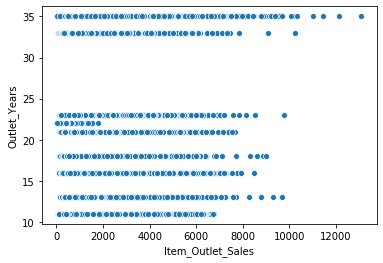

In [99]:
sns.scatterplot(x='Item_Outlet_Sales',y='Outlet_Years',data=train)

In [100]:
#we will now be converting all the object type inputs into numeric
cat_var = ['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_var:
    train[i] = le.fit_transform(train[i])

In [101]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,21
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,11
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,21
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,22
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,33


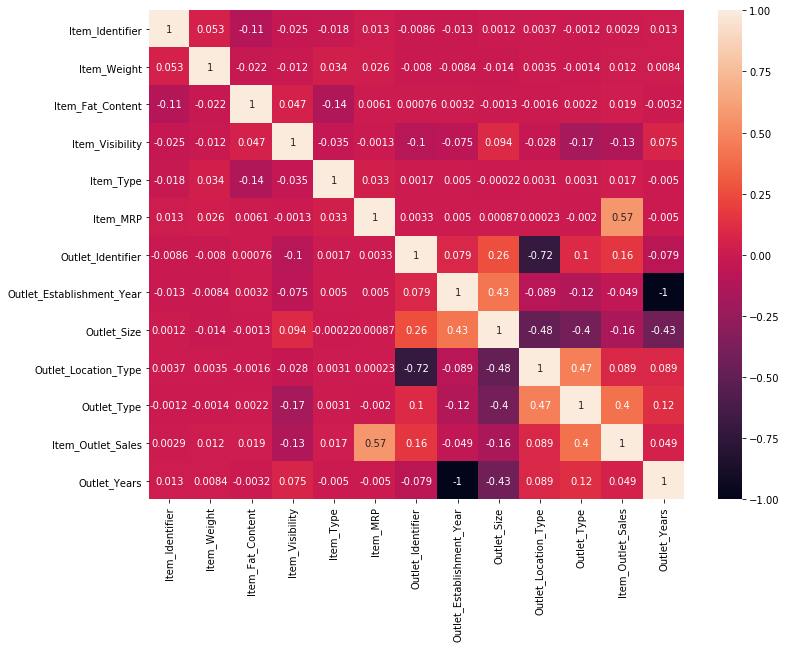

In [102]:
#correlation heatmap
train_cor = train.corr()

plt.figure(figsize=(12,9))
sns.heatmap(train_cor,annot=True)
plt.show()

In [103]:
#removing Outlet_Eastablishment_Year as it is showing negative correlation
#removing Item_Identifier as it shows very less correlation

train.drop(columns=['Outlet_Establishment_Year','Item_Identifier'],inplace=True)

In [104]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,21
1,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,11
2,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,21
3,19.20,1,0.000000,6,182.0950,0,2,2,0,732.3800,22
4,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052,33


# Splitting data into input and target and training/testing

In [105]:
x = train.drop('Item_Outlet_Sales',axis=1)
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,9.30,0,0.016047,4,249.8092,9,1,0,1,21
1,5.92,1,0.019278,14,48.2692,3,1,2,2,11
2,17.50,0,0.016760,10,141.6180,9,1,0,1,21
3,19.20,1,0.000000,6,182.0950,0,2,2,0,22
4,8.93,0,0.000000,9,53.8614,1,0,2,1,33


In [106]:
y = train['Item_Outlet_Sales']
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [107]:
print('shape of input data is :', x.shape)
print('shape of Target data is :', y.shape)

shape of input data is : (8523, 10)
shape of Target data is : (8523,)


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [109]:
#setting objects for all algorithms
lr=LinearRegression()
rfr=RandomForestRegressor()
adb=AdaBoostRegressor()
svr=SVR()
rg=Ridge()
ls=Lasso()
en=ElasticNet()
dt=DecisionTreeRegressor()

In [110]:
models = [lr,dt,rfr,ls,rg,en,adb,svr]

for model in models:
    print("model name =",model)
    model.scores = cross_val_score(model, x, y, cv=10)
    print('Model scores :',model.scores)
    print('Model mean score: ',model.scores.mean())
    print('Model std score :', model.scores.std())
    print('\n')
    

model name = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Model scores : [0.51026175 0.52643209 0.4929839  0.51747042 0.45186838 0.50693028
 0.52330239 0.48266179 0.51756048 0.48178442]
Model mean score:  0.5011255899780865
Model std score : 0.02234771976508354


model name = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Model scores : [0.20307786 0.25689636 0.05555657 0.23032159 0.03004176 0.23104083
 0.15011802 0.09870616 0.28255041 0.16450744]
Model mean score:  0.17028170128565429
Model std score : 0.08177437406277917


model name = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse

In [111]:
#random forest model 
max_rfr_score = 0
for r_state in range(41,100):
    X_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.33,random_state=r_state)
    rfr = RandomForestRegressor()
    rfr.fit(X_train,y_train)
    rfr_pred = rfr.predict(x_test)
    r2_scr = r2_score(y_test,rfr_pred)
    if r2_scr>max_rfr_score:
        max_rfr_score=r2_scr
        final_r_state = r_state
        
print('max r2_score for the given ','', final_r_state, 'is', max_rfr_score)

max r2_score for the given   43 is 0.577971578316465


In [113]:
#creating final model

X_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.33,random_state=43)
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(x_test)
r2_scr = r2_score(y_test,rfr_pred)

In [114]:
from math import sqrt
print('r2_score : ', r2_scr)
print('Mean Absolute Error : ', mean_absolute_error(y_test,rfr_pred))
print('Mean squared error : ', mean_squared_error(y_test,rfr_pred))
print('root mean squared error : ', sqrt(mean_squared_error(y_test,rfr_pred)))

r2_score :  0.5822644121215381
Mean Absolute Error :  760.3963432890154
Mean squared error :  1205753.6523447412
root mean squared error :  1098.068145583297


In [115]:
#saving the model
from sklearn.externals import joblib
joblib.dump(rfr_pred,'bigmart_train.pkl')

['bigmart_train.pkl']